In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import networkx as nx


In [2]:
df = pd.read_csv("../data/processed/movie_data_processed.csv")
df.head(5)

,Title,Year,Rated,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,imdbRating,imdbVotes,imdbID,BoxOffice,Status,wr
0,Breaking Bad,NaN,TV-MA,49 min,"Crime, Drama, Thriller",Unknown,Vince Gilligan,"Bryan Cranston, Aaron Paul, Anna Gunn",A chemistry teacher diagnosed with inoperable ...,"English, Spanish",United States,Won 16 Primetime Emmys. 169 wins & 269 nominat...,https://m.media-amazon.com/images/M/MV5BMzU5ZG...,"[{'Source': 'Internet Movie Database', 'Value'...",9.5,2225876,tt0903747,Unknown,Finished,9.465635
1,The Shawshank Redemption,1994-01-01,R,142 min,Drama,Frank Darabont,"Stephen King, Frank Darabont","Tim Robbins, Morgan Freeman, Bob Gunton",A banker convicted of uxoricide forms a friend...,English,United States,Nominated for 7 Oscars. 21 wins & 42 nominatio...,https://m.media-amazon.com/images/M/MV5BMDAyY2...,"[{'Source': 'Internet Movie Database', 'Value'...",9.3,2945396,tt0111161,"$28,767,189",Finished,9.275364
2,Band of Brothers,2001-01-01,TV-MA,594 min,"Drama, History, War",Unknown,Unknown,"Scott Grimes, Damian Lewis, Ron Livingston",The story of Easy Company of the U.S. Army 101...,"English, Dutch, French, German, Lithuanian","United Kingdom, United States",Won 6 Primetime Emmys. 34 wins & 26 nomination...,https://m.media-amazon.com/images/M/MV5BMTQ3NT...,"[{'Source': 'Internet Movie Database', 'Value'...",9.4,542582,tt0185906,Unknown,Finished,9.266599
3,Chernobyl,2019-01-01,TV-MA,330 min,"Drama, History, Thriller",Unknown,Craig Mazin,"Jessie Buckley, Jared Harris, Stellan Skarsgård","In April 1986, the city of Chernobyl in the So...","English, Russian, Ukrainian","United States, United Kingdom",Won 10 Primetime Emmys. 85 wins & 60 nominatio...,https://m.media-amazon.com/images/M/MV5BMmQ0Y2...,"[{'Source': 'Internet Movie Database', 'Value'...",9.3,902682,tt7366338,Unknown,Finished,9.220862
4,Game of Thrones,NaN,TV-MA,57 min,"Action, Adventure, Drama",Unknown,"David Benioff, D.B. Weiss","Emilia Clarke, Peter Dinklage, Kit Harington",Nine noble families fight for control over the...,English,"United States, United Kingdom",Won 59 Primetime Emmys. 397 wins & 655 nominat...,https://m.media-amazon.com/images/M/MV5BYzE5Mj...,"[{'Source': 'Internet Movie Database', 'Value'...",9.2,2359163,tt0944947,Unknown,Finished,9.170163


# Top 10 phim có điểm số imdbRating cao nhất

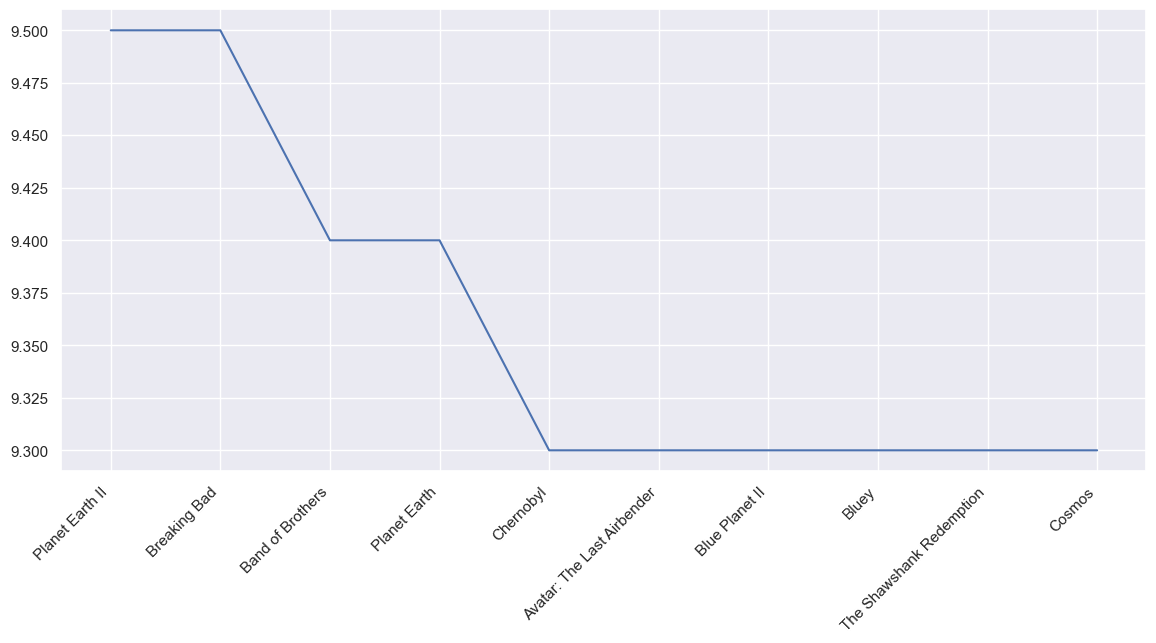

In [3]:
sns.set(rc={'figure.figsize':(14,6)})

top_10_imdbRating = df.groupby('Title', as_index=False)['imdbRating'].sum().sort_values(by= 'imdbRating', ascending= False).head(10)

plt.xticks(rotation=45, ha="right")
plt.plot(top_10_imdbRating['Title'], top_10_imdbRating['imdbRating'])

- Biểu đồ cho phép người xem thấy những bộ phim có điểm số đánh giá cao nhất trên trang IMDb.
- Dựa vào điểm số, có thể thấy sơ qua chất lượng của bộ phim.

# Top 10 phim có lượng imdbVotes cao nhất

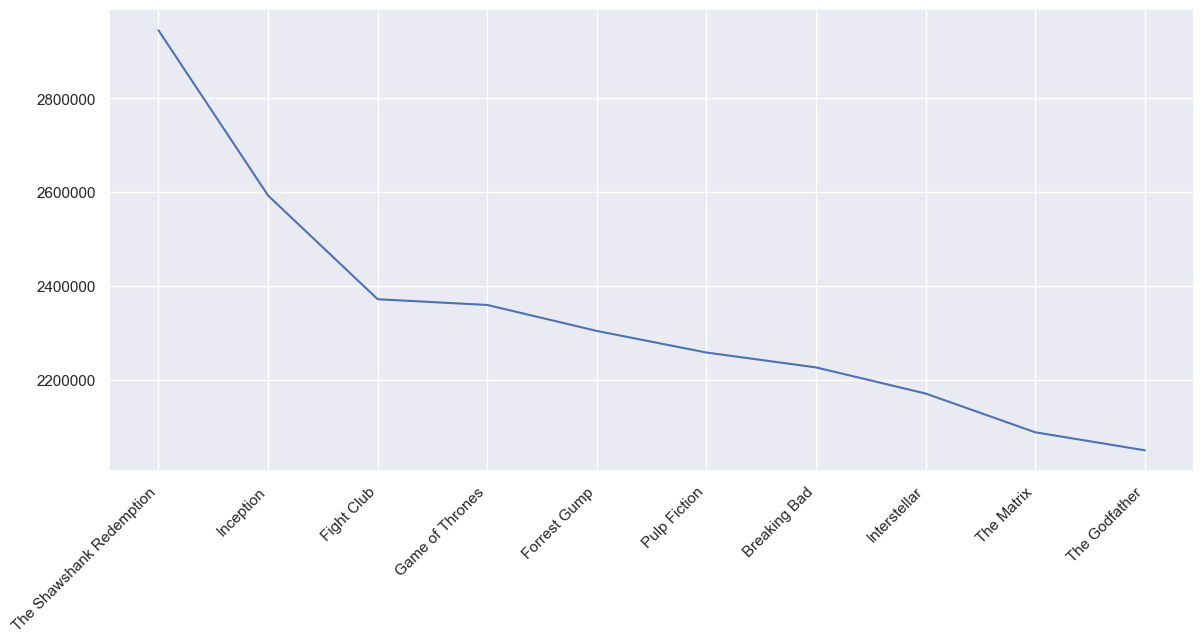

In [4]:
sns.set(rc={'figure.figsize':(14,6)})

top_10_imdbVotes = df.groupby('Title', as_index=False)['imdbVotes'].sum().sort_values(by= 'imdbVotes', ascending= False).head(10)

plt.ticklabel_format(scilimits=(-5, 8))
plt.xticks(rotation=45, ha="right")
plt.plot(top_10_imdbVotes['Title'], top_10_imdbVotes['imdbVotes'])

- Biểu đồ cho người xem thấy những bộ phim có số lượng lượt đánh giá cao nhất trên trang IMDb.
- Dựa vào số lượng đánh giá, có thể thấy được mức độ phổ biến của phim.

# Top 10 phim có điểm số wr cao nhất

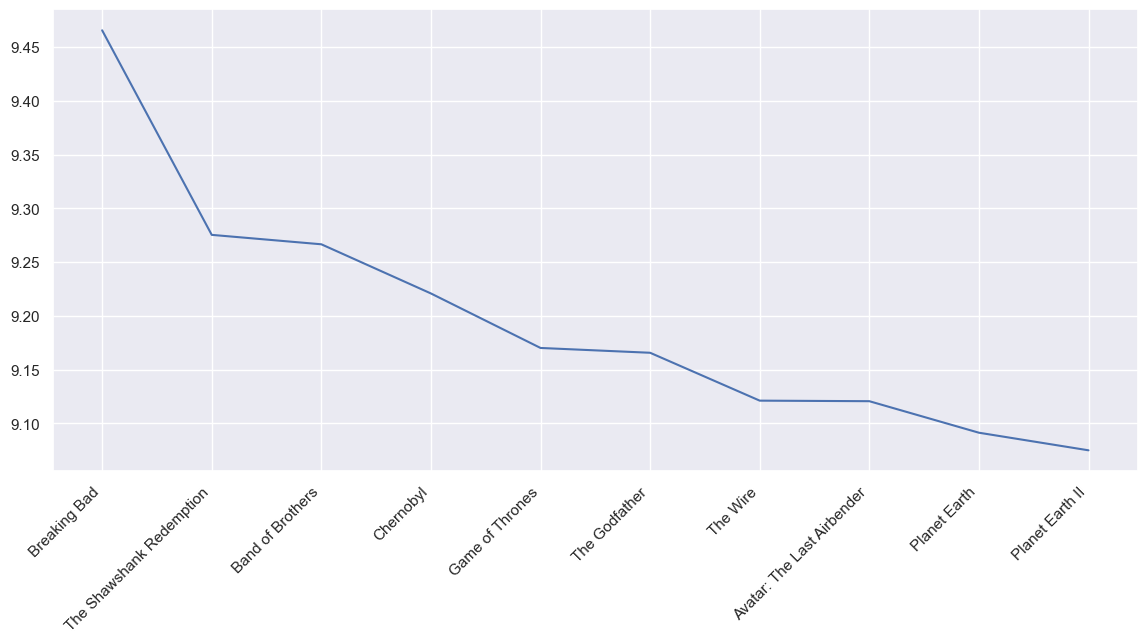

In [5]:
sns.set(rc={'figure.figsize':(14,6)})

top_10_wr = df.groupby('Title', as_index=False)['wr'].sum().sort_values(by= 'wr', ascending= False).head(10)

plt.xticks(rotation=45, ha="right")
plt.plot(top_10_wr['Title'], top_10_wr['wr'])

- Biểu đồ cho người xem thấy những bộ phim có điểm số Weighted Average cao nhất trên trang IMDb.
- Điểm số trên được tính từ giá trị `imdbRatings` và `imdbVotes`, giúp tránh việc bộ phim được dánh giá không chính xác  
 (VD: phim có số lượt đánh giá nhiều và điểm cao sẽ có `wr` cao hơn phim có số lượt đánh giá ít và điểm cao).

# Phân phối của các cột numeric

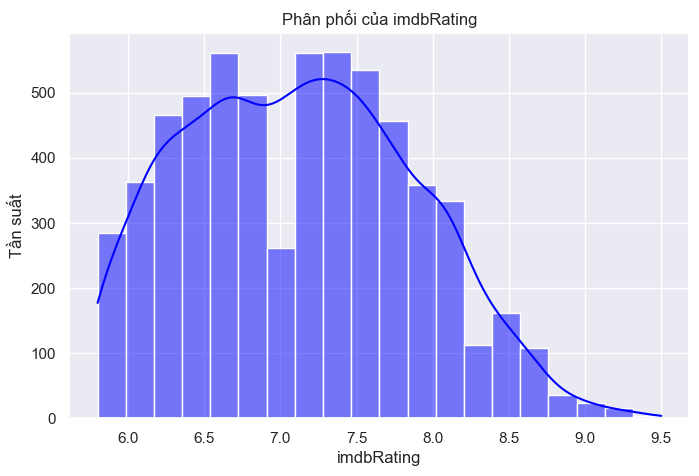

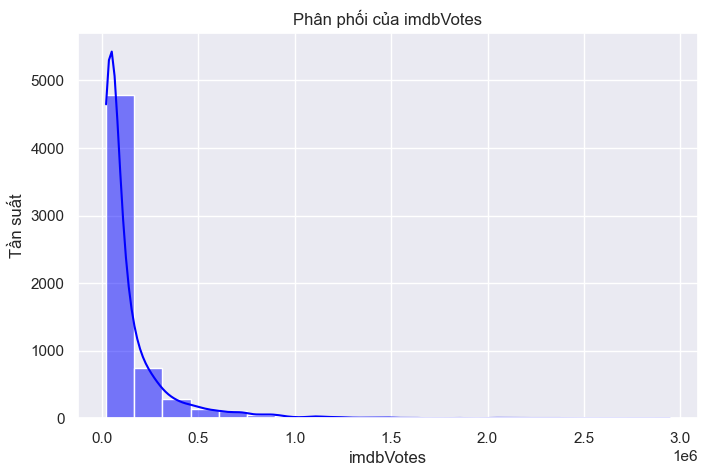

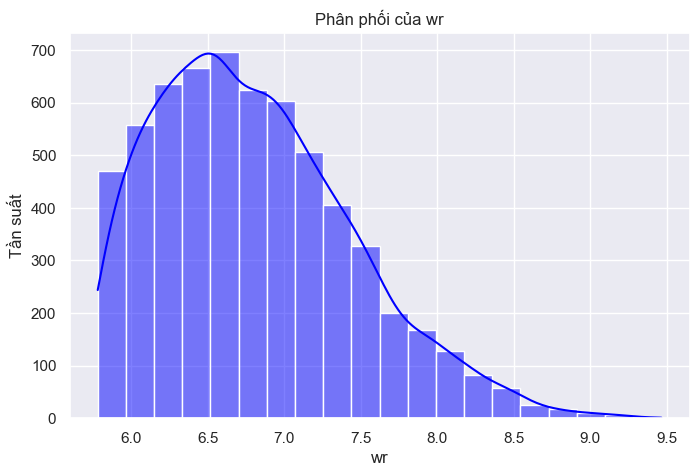

In [6]:
# Biểu đồ Histogram cho các cột số
numerical_columns = ['imdbRating', 'imdbVotes', 'wr']
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=20, color='blue')
    plt.title(f'Phân phối của {col}')
    plt.xlabel(col)
    plt.ylabel('Tần suất')
    plt.show()

# 10 thể loại phổ biến nhất

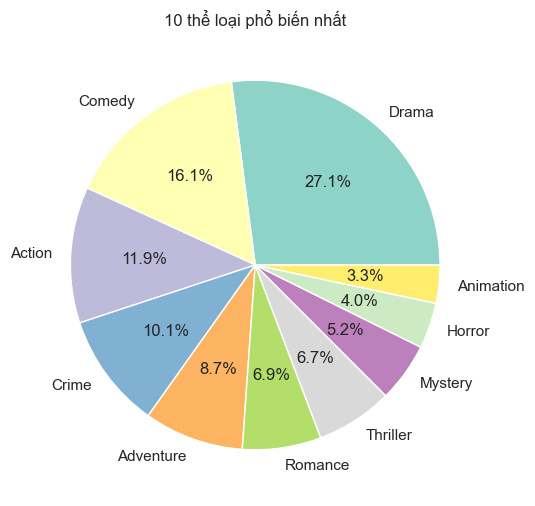

In [7]:
genre = []
for list_genre in df['Genre']:
    list_genre = list_genre.split(', ')
    genre.extend(list_genre)
genre = pd.DataFrame(genre)

plt.figure(figsize=(10, 6))
genre[0].value_counts().head(10).plot.pie(autopct='%1.1f%%', cmap='Set3')
plt.title('10 thể loại phổ biến nhất')
plt.ylabel('')
plt.show()

# 10 ngôn ngữ phổ biến nhất

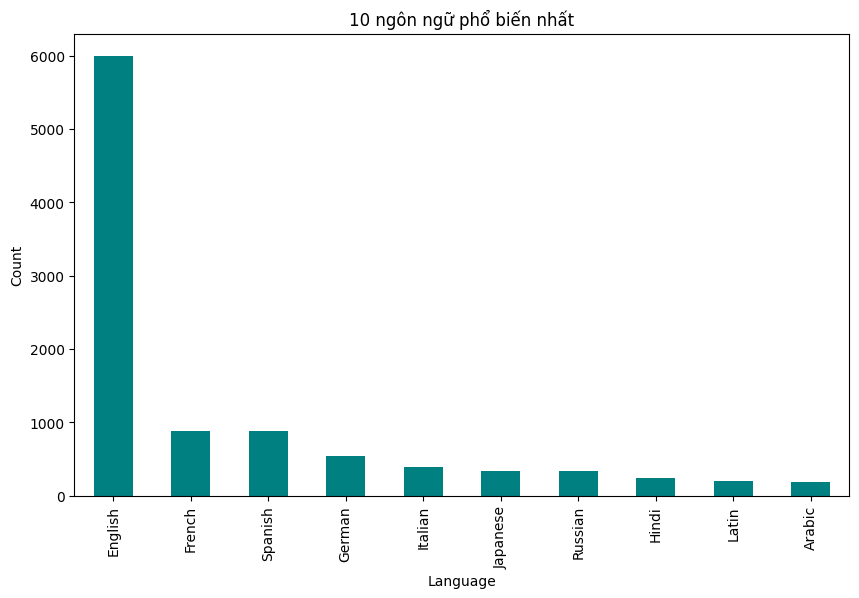

In [44]:
language = []
for list_language in df['Language']:
    list_language = list_language.split(', ')
    language.extend(list_language)
language = pd.DataFrame(language)

plt.figure(figsize=(10, 6))
language[0].value_counts().head(10).plot.bar(color='teal')
plt.title('10 ngôn ngữ phổ biến nhất')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

# Mối tương quan giữa các cột numeric

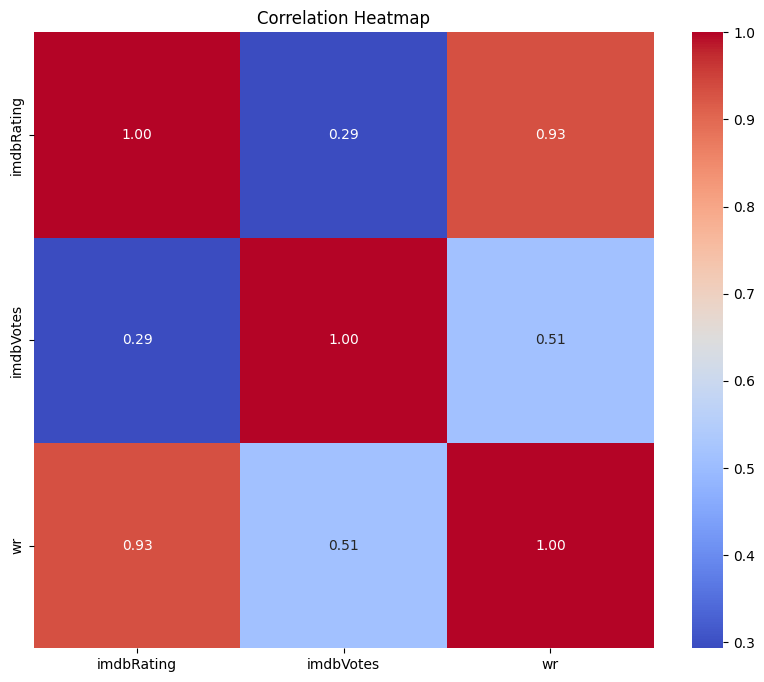

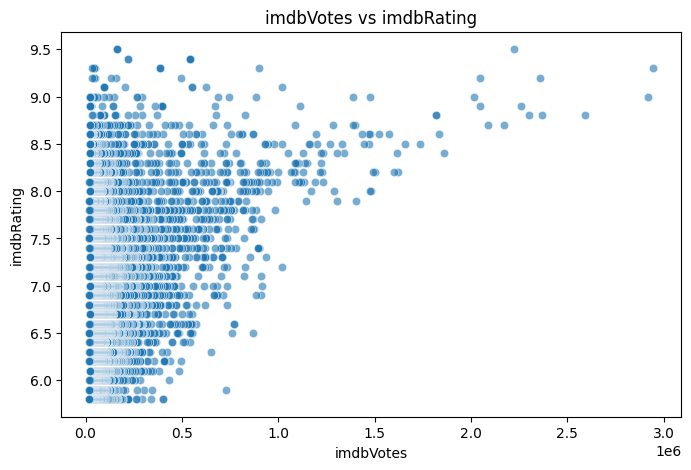

In [10]:
# Heatmap cho hệ số tương quan
plt.figure(figsize=(10, 8))
correlation = df[['imdbRating', 'imdbVotes', 'wr']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plot giữa imdbRating và imdbVotes
plt.figure(figsize=(8, 5))
sns.scatterplot(x='imdbVotes', y='imdbRating', data=df, alpha=0.6)
plt.title('imdbVotes vs imdbRating')
plt.xlabel('imdbVotes')
plt.ylabel('imdbRating')
plt.show()


# 10 thể loại có IMDb Rating cao nhất

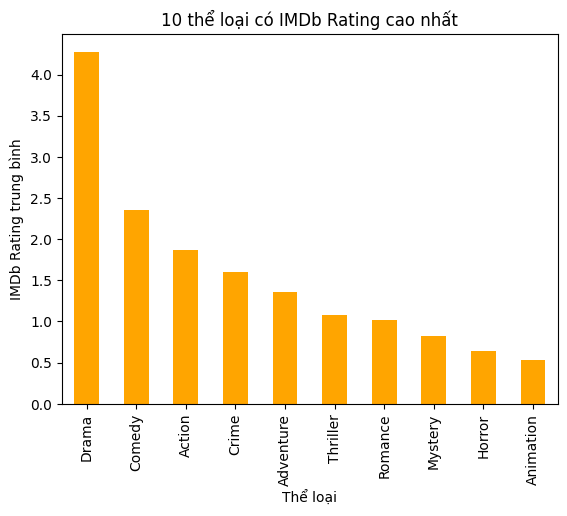

In [12]:
# Phân tích Genre và IMDb Rating
genre_ratings = df['Genre'].str.get_dummies(sep=', ').mul(df['imdbRating'], axis=0).mean()
genre_ratings.sort_values(ascending=False).head(10).plot(kind='bar', color='orange')
plt.title('10 thể loại có IMDb Rating cao nhất')
plt.xlabel('Thể loại')
plt.ylabel('IMDb Rating trung bình')
plt.show()

# Các từ khóa phổ biến trong cốt truyện phim

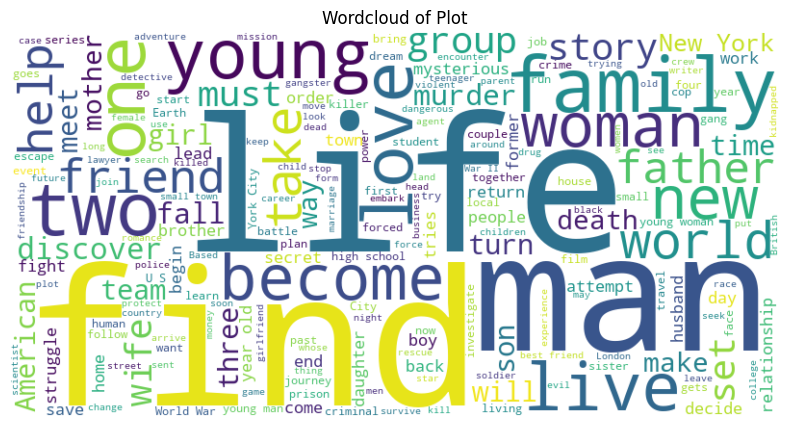

In [ ]:
# Tạo WordCloud
text = " ".join(df['Plot'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud of Plot')
plt.show()


# Mối quan hệ giữa các diễn viên

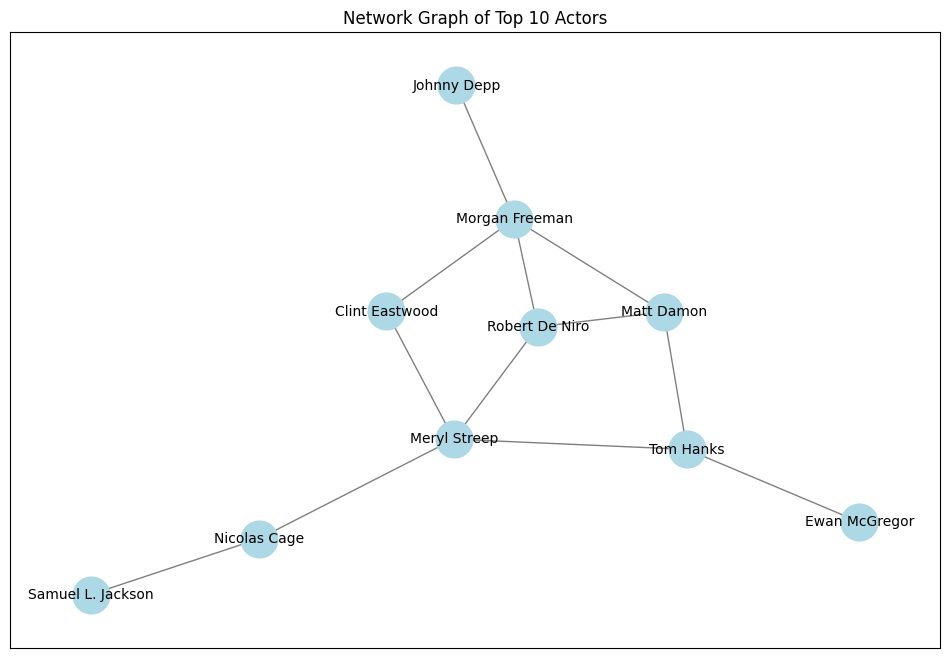

In [ ]:

# Tạo dữ liệu network
actor_pairs = df['Actors'].dropna().str.split(', ').explode().value_counts()
top_actors = actor_pairs.head(10).index

G = nx.Graph()
for movie in df['Actors'].dropna():
    actors = movie.split(', ')
    for i in range(len(actors)):
        for j in range(i + 1, len(actors)):
            if actors[i] in top_actors and actors[j] in top_actors:
                G.add_edge(actors[i], actors[j])

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10)
plt.title('Network Graph of Top 10 Actors')
plt.show()
